In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("train.csv")
df

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [3]:
df.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [10]:
df.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id29920,1
Description,38932,38932,Chancellor Hotel was in a good location We fo...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [12]:
count=df.isnull().sum().sort_values(ascending=False)
percentage=((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,
keys=['Count','Percentage'])
print('Count and Percentage of missing values for columns:')
missing_data

Count and Percentage of missing values for columns:


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


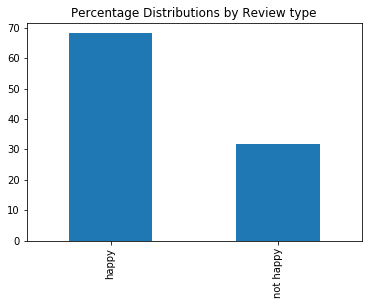

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(df. Is_Response.value_counts(normalize=True)*100,2))
round(df. Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by Review type')
plt.show()


In [19]:
df.drop(columns=["Device_Used","User_ID","Browser_Used"],inplace=True)

In [20]:
import re
import string
def text_clean_1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' %re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*', '',text)
    return text
cleaned1=lambda x:text_clean_1(x)

In [22]:
df['cleaned_description']=pd.DataFrame(df.Description.apply(cleaned1))
df.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April April ...,not happy,i stayed at the crown plaza april april ...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had rooms One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whi...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,Wonderful staff great location but it was de...,not happy,wonderful staff great location but it was de...


In [24]:
def text_clean_2(text):
    text=re.sub('[''""...]','',text)
    text=re.sub('\n','',text)
    return text
cleaned2 =lambda x:text_clean_2(x)

In [25]:
df['cleaned_description_new']=pd.DataFrame(df['cleaned_description'].apply(cleaned2))
df.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April April ...,not happy,i stayed at the crown plaza april april ...,i stayed at the crown plaza april april ...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had rooms One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ...,we had rooms one was very nice and clearly ...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whi...,my wife i stayed in this glorious city a whi...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,Wonderful staff great location but it was de...,not happy,wonderful staff great location but it was de...,wonderful staff great location but it was de...


In [27]:
from sklearn.model_selection import train_test_split
X=df.cleaned_description_new
y=df.Is_Response

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=225)
print('X_train:',len(X_train))
print('X_test:',len(X_test))
print('y_train:',len(y_train))
print('y_test:',len(y_test))

X_train: 35038
X_test: 3894
y_train: 35038
y_test: 3894


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec=TfidfVectorizer()
clf2=LogisticRegression(solver="lbfgs")
from sklearn.pipeline import Pipeline

In [33]:
model=Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
predictions=model.predict(X_test)
confusion_matrix(predictions,y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[2411,  299],
       [ 160, 1024]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Accuracy:",accuracy_score(predictions,y_test))
print("Precision:",precision_score(predictions,y_test,average='weighted'))
print("Recall:",recall_score(predictions,y_test,average='weighted'))

Accuracy: 0.8821263482280431
Precision: 0.8879722340826498
Recall: 0.8821263482280431


In [36]:
example=["I'm Satisfied"]
result=model.predict(example)
print(result)

['happy']


In [4]:
df1=pd.read_csv("test.csv")
df1

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile
...,...,...,...,...
29399,id109531,I stayed at the hotel and towers for a confere...,Chrome,Mobile
29400,id109532,Trying to stay within the Marriott family and ...,Internet Explorer,Tablet
29401,id109533,"We stayed for - nights with our little dog,ver...",Edge,Desktop
29402,id109534,Stayed at the Yotel over the weekend and was v...,InternetExplorer,Desktop
